In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import tensorflow 
from tensorflow import keras
from tensorflow.keras.datasets import imdb
import warnings
warnings.filterwarnings('ignore')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense 


In [4]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.shape # will take 5000 Tokens For Training

(50000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
# Check for Duplicates
df.duplicated().sum()

np.int64(418)

In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

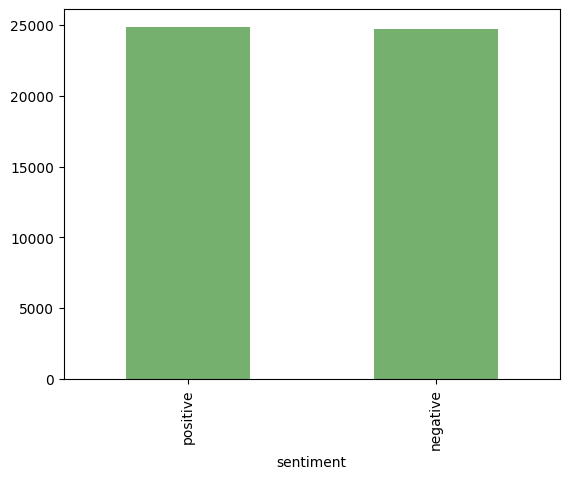

In [12]:
df['sentiment'].value_counts().plot(kind='bar', color='#75B06F')
# The Data is Balanaced 

In [13]:
import nltk
ps = PorterStemmer()
nltk.download('punkt')
from bs4 import BeautifulSoup

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
def preprocess_text(text):
    text = BeautifulSoup(text,'html.parser').get_text()
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    
            
    return ' '.join(y)

In [15]:
text = df['review'][1]

In [16]:
preprocess_text(text)

'wonder littl product film techniqu fashion give comfort sometim discomfort sens realism entir piec actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

In [17]:
df['review']= df['review'].apply(preprocess_text)

In [18]:
df.head() 

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,positive
1,wonder littl product film techniqu fashion giv...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


In [19]:
from wordcloud import WordCloud

In [20]:
wc = WordCloud(width=300, height=300,   background_color='white' )

In [21]:
positive = wc.generate(df[df['sentiment'] =='positive']['review'].str.cat(sep=''))

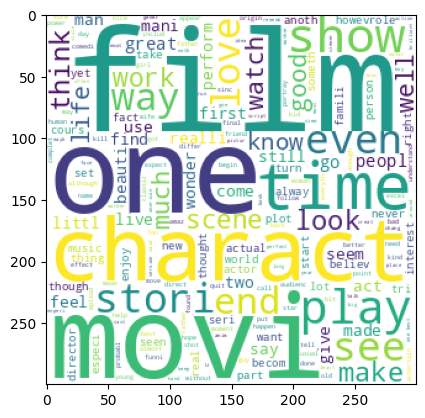

In [22]:
plt.imshow(positive)


In [23]:
negative = wc.generate(df[df['sentiment']=='negative']['review'].str.cat(sep=''))

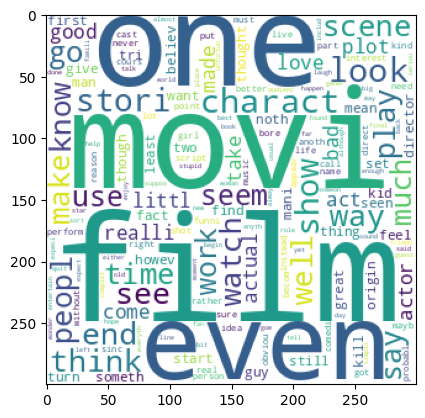

In [24]:
plt.imshow(negative)

In [25]:
positive_msg = []
for msg in df[df['sentiment'] =='positive']['review']:
    # print(msg)
    for i in msg.split():
        positive_msg.append(i)

In [26]:
df['postive_msg'] = pd.DataFrame(positive_msg)


In [27]:
negative_msg = []
for msg in df[df['sentiment'] =='negative']['review']:
    # print(msg)
    for i in msg.split():
        negative_msg.append(i)

In [28]:
df['negative_msg'] = pd.DataFrame(negative_msg)

Text(0.5, 0, 'Counts')

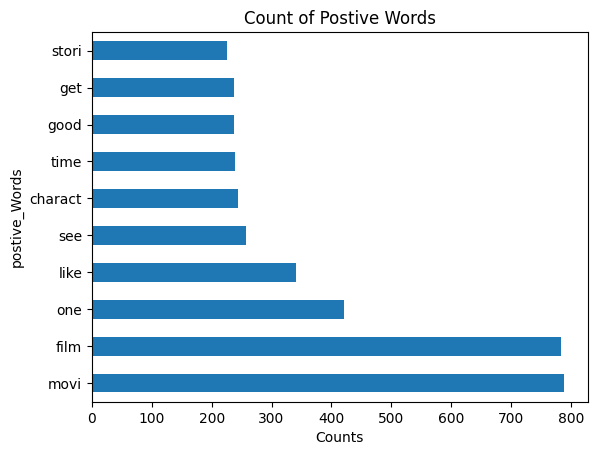

In [29]:
plt.title('Count of Postive Words')
df['postive_msg'].value_counts().head(10).plot(kind='barh')
plt.ylabel("postive_Words")
plt.xlabel("Counts")

Text(0.5, 0, 'Counts')

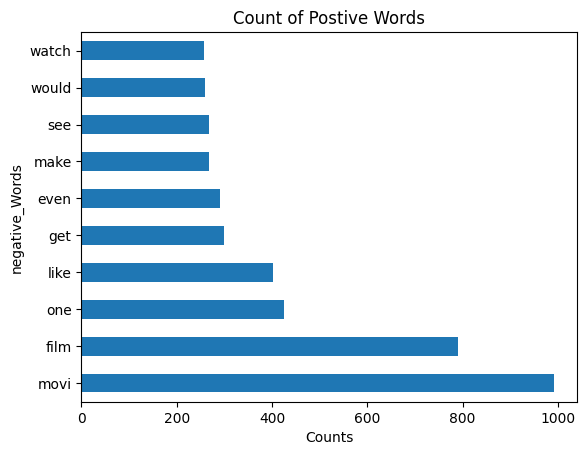

In [30]:
plt.title('Count of Postive Words')
df['negative_msg'].value_counts().head(10).plot(kind='barh')
plt.ylabel("negative_Words")
plt.xlabel("Counts")

In [31]:
#  AS we Can See some Words are Common in both = > ['Movi', 'film', 'One','Like']

In [106]:
X = df['review']

y = df['sentiment']

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify = y)

In [108]:
X_train.shape

(39665,)

In [109]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer =Tokenizer(num_words=5000, oov_token='oov')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
# X_test_seq

In [110]:
max_len = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len,padding='post')
X_test_pad = pad_sequences(X_test_seq ,maxlen=max_len, padding='post')


In [111]:
X_test_pad

array([[  20, 1455,   79, ...,    0,    0,    0],
       [   1,  541, 1288, ...,    0,    0,    0],
       [3536,   65,    4, ...,    0,    0,    0],
       ...,
       [   7,   15,    7, ...,    0,    0,    0],
       [   1, 2756,  531, ...,    0,    0,    0],
       [ 105,   10,    3, ...,    0,    0,    0]], dtype=int32)

In [112]:
from tensorflow.keras.layers import *
# Model
model = Sequential([
    Embedding(input_dim=25000, output_dim=128, input_shape=(200,)),
    Bidirectional(LSTM(128)),
    Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 200, 128)       │     3,200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 256)            │       263,168 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,463,425 (13.21 MB)

 Trainable params: 3,463,425 (13.21 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [114]:
y_train = y_train.map({'negative': 0, 'positive': 1})
y_test  = y_test.map({'negative': 0, 'positive': 1})

In [115]:
y_train = y_train.astype('int32')
y_test  = y_test.astype('int32')


In [116]:
history = model.fit(
    X_train_pad,
    y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.3
)


Epoch 1/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.7402 - loss: 0.5084 - val_accuracy: 0.8531 - val_loss: 0.3713
Epoch 2/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8894 - loss: 0.2813 - val_accuracy: 0.8761 - val_loss: 0.3213
Epoch 3/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9132 - loss: 0.2288 - val_accuracy: 0.8614 - val_loss: 0.3246
Epoch 4/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9314 - loss: 0.1892 - val_accuracy: 0.8208 - val_loss: 0.4469
Epoch 5/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9387 - loss: 0.1671 - val_accuracy: 0.8634 - val_loss: 0.3989
Epoch 6/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9481 - loss: 0.1419 - val_accuracy: 0.8529 - val_loss: 0.4032
Epoch 7/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9598 - loss: 0.1168 - val_accuracy: 0.8531 - val_loss: 0.4521
Epoch 8/15
434/434 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9589 - loss: 0.1150 - 

In [121]:
model.evaluate(X_test_pad,y_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8515 - loss: 0.7711


[0.7836699485778809, 0.8459211587905884]

In [123]:
y_pred = model.predict(X_test_pad)
y_pred = (y_pred > 0.5 ).astype('int')
y_pred

310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [124]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification_report: \n",classification_report(y_pred,y_test))

Classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      4752
           1       0.87      0.83      0.85      5165

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



In [139]:
matrix =  confusion_matrix(y_pred,y_test)


In [150]:
df.head()

,review,sentiment,postive_msg,negative_msg
0,one review mention watch 1 oz episod hook righ...,positive,one,basic
1,wonder littl product film techniqu fashion giv...,positive,review,famili
2,thought wonder way spend time hot summer weeke...,positive,mention,littl
3,basic famili littl boy jake think zombi closet...,negative,watch,boy
4,petter mattei love time money visual stun film...,positive,1,jake


In [157]:
model.save("Sentimental_Analyisis_BiDerectionalRNN_acc_85+.h5")